In [3]:
# Replace with your file path
file_path = '/content/F1 data main - Sheet1.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn   as sns
import sys


In [4]:
data = pd.read_csv(file_path)

In [5]:
data.head()

,Driver,Race,Final_Position,Total_Pit_Time
0,Piastri,China,1,46.175
1,Norris,China,2,22.213
2,Russell,China,3,22.324
3,Verstappen,China,4,22.454
4,Ocon,China,5,23.114


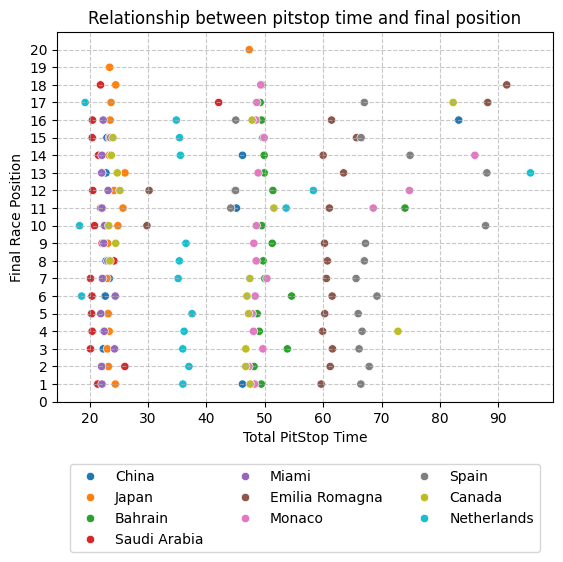

In [6]:
sns.scatterplot(data, x='Total_Pit_Time', y='Final_Position', hue='Race')
plt.yticks(range(0,21))
plt.ylim(0,21)
plt.xlabel("Total PitStop Time")
plt.ylabel("Final Race Position")
plt.title("Relationship between pitstop time and final position")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

#### Regression Equation

$$\text{Final Position} = \beta_0 + \beta_1 \text{Pit Stop Time} + \epsilon$$

In [7]:
model=smf.ols('Final_Position ~ Total_Pit_Time',data).fit()
print(model.summary().tables[1])


                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.3711      0.921      9.090      0.000       6.553      10.189
Total_Pit_Time     0.0221      0.020      1.094      0.275      -0.018       0.062


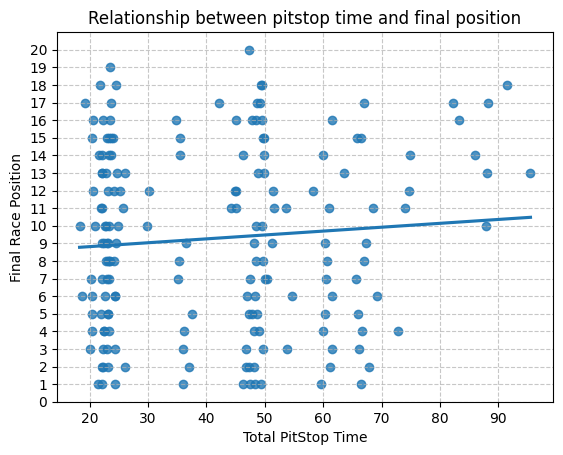

In [8]:
sns.regplot(data, x='Total_Pit_Time', y='Final_Position', ci=None)
line_kws={'color': 'red', 'linewidth': 2}
plt.yticks(range(0,21))
plt.ylim(0,21)
plt.xlabel("Total PitStop Time")
plt.ylabel("Final Race Position")
plt.title("Relationship between pitstop time and final position")
plt.grid(True, linestyle='--', alpha=0.7)

Residuals


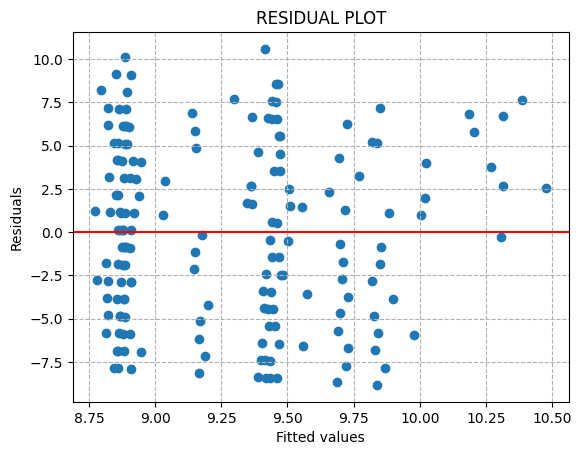

In [23]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('RESIDUAL PLOT')
plt.grid(True, linestyle='--')

(0.0, 11.0)

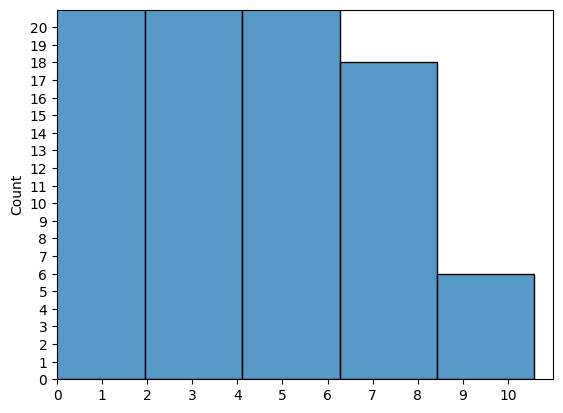

In [27]:
residuals = model.resid
sns.histplot(residuals)
plt.yticks(range(0,21))
plt.ylim(0,21)
plt.xticks(range(0,11))
plt.xlim(0,11)

<Axes: ylabel='Count'>

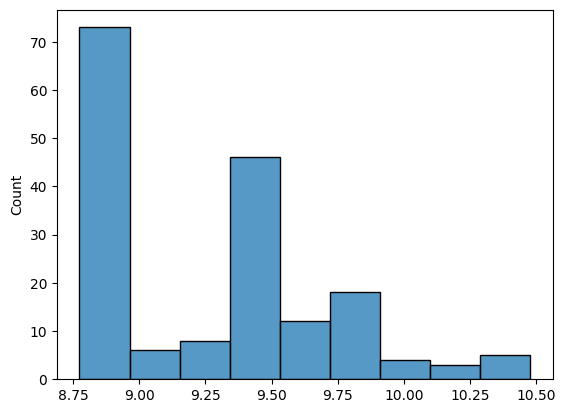

In [24]:
predictions = model.predict()
sns.histplot(predictions)

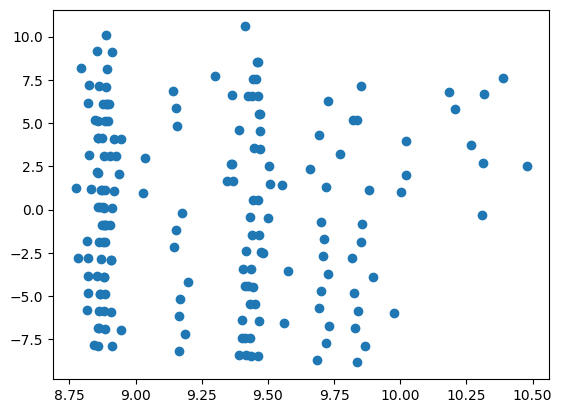

In [25]:
plt.scatter(predictions, residuals)